<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 29: Multiple Linear Regression
- Multiple predictors
- Homebrew using Matrix Algebra
- Using `statsmodel`
- Interpreting results, is a predictor useful?

## Multiple Linear Regression

*What Is Multiple Linear Regression (MLR)?*

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable.

:::{admonition} Key Takeaways
:class: tip
- Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.
- Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.
- MLR is used extensively in engineering, econometrics, medical, and financial inference.

 Formula and Calculation of Multiple Linear Regression

The MLR formula is:

$y_i=\beta_0+\beta_1 x_{i,1}+\beta_2 x_{i,2} + \dots + \beta_p x_{i,p} + \epsilon_i$

where, 

$\begin{aligned}
&\text{for } i = n \text{ observations:}\\
&y_i=\text{dependent variable}\\
&x_i=\text{explanatory variables}\\
&\beta_0=\text{y-intercept (constant term)}\\
&\beta_p=\text{slope coefficients for each explanatory variable}\\
&\epsilon=\text{the model's error term (also known as the residuals)}
&\end{aligned}$
    
Simple linear regression (we have already examined) is a function that allows us to make predictions about one variable (the dependent or response variable) based on the information that is known about another variable (the independent or predictor variable). 
Linear regression is only used when one has two continuous variables — an independent variable and a dependent variable. 
The independent variable is the parameter that is used to calculate the dependent variable or outcome. 

A multiple regression model extends to several explanatory variables.

The multiple regression model is based on the following assumptions: 

1. There is a linear relationship between the dependent variables and the independent variables
2. The independent variables are not too highly correlated with each other
3. $y_i$ observations are selected independently and randomly from the population
4. The residuals should be normally distributed with a mean of 0 and variance $\sigma$

We can test condition 4 using the hypothesis tests we already examined, and we can test conjecture 2 using the correlation matrix methods from earlier. Conjecture 1 we will examine by plotting, and 3 we are kind of stuck with (unless we know its not true).

The coefficient of determination (R-squared) is a statistical metric that is used to measure how much of the variation in outcome can be explained by the variation in the independent variables. R$^2$ always increases as more predictors are added to the MLR model, even though the predictors may not be related to the outcome variable.

Thus R$^2$ by itself can't thus be used to identify which predictors should be included in a model and which should be excluded. R$^2$ can only be between 0 and 1, where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables.

Generally we assess the value of a coefficient ($\beta_i$) based on its interval estimate in the output table, if that interval includes 0 we might decide its a useless variable and drop it from the regression, reanalyze with fewer variables.


### Homebrew using Linear Algebra

Consider the example below.

:::{note}
The first part is just the linear solver script and support functions, these are copy-paste from prior lessons
:::

In [28]:
# linearsolver with pivoting adapted from 
# https://stackoverflow.com/questions/31957096/gaussian-elimination-with-pivoting-in-python/31959226
def linearsolver(A,b):
    n = len(A)
    M = A

    i = 0
    for x in M:
     x.append(b[i])
     i += 1
# row reduction with pivots
    for k in range(n):
     for i in range(k,n):
       if abs(M[i][k]) > abs(M[k][k]):
          M[k], M[i] = M[i],M[k]
       else:
          pass

     for j in range(k+1,n):
         q = float(M[j][k]) / M[k][k]
         for m in range(k, n+1):
            M[j][m] -=  q * M[k][m]
# allocate space for result
    x = [0 for i in range(n)]
# back-substitution
    x[n-1] =float(M[n-1][n])/M[n-1][n-1]
    for i in range (n-1,-1,-1):
      z = 0
      for j in range(i+1,n):
          z = z  + float(M[i][j])*x[j]
      x[i] = float(M[i][n] - z)/M[i][i]
# return result
    return(x)
#######
# matrix multiply script
def mmult(amatrix,bmatrix,rowNumA,colNumA,rowNumB,colNumB):
    result_matrix = [[0 for j in range(colNumB)] for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumB):
            for k in range(0,colNumA):
                result_matrix[i][j]=result_matrix[i][j]+amatrix[i][k]*bmatrix[k][j]
    return(result_matrix)
# matrix vector multiply script
def mvmult(amatrix,bvector,rowNumA,colNumA):
    result_v = [0 for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,colNumA):
                result_v[i]=result_v[i]+amatrix[i][j]*bvector[j]
    return(result_v)
def myline(slope,intercept,value1,value2):
    '''Returns a tuple ([x1,x2],[y1,y2]) from y=slope*value+intercept'''
    listy = [] 
    listx = []
    listx.append(value1)
    listx.append(value2)
    listy.append(slope*listx[0]+intercept)
    listy.append(slope*listx[1]+intercept)
    return(listx,listy)
def makeAbear(xvalues,yvalues,xleft,yleft,xright,yright,xlab,ylab,title):
# plotting function dependent on matplotlib installed above 
# xvalues, yvalues == data pairs to scatterplot; FLOAT
# xleft,yleft == left endpoint line to draw; FLOAT
# xright,yright == right endpoint line to draw; FLOAT
# xlab,ylab == axis labels, STRINGS!!
# title == Plot title, STRING
    import matplotlib.pyplot 
    matplotlib.pyplot.scatter(xvalues,yvalues)
    matplotlib.pyplot.plot([xleft, xright], [yleft, yright], 'k--', lw=2, color="red")
    matplotlib.pyplot.xlabel(xlab)
    matplotlib.pyplot.ylabel(ylab)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.show()
    return

Here is the actual example

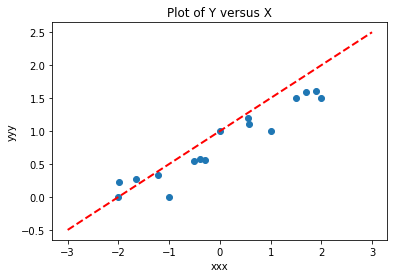

In [48]:
# Make two lists
yyy = [0,0,1,1,1.5,0.55,0.57,0.56,1.5,1.6,1.61,1.2,1.1,0.22,0.27,0.33]
xxx = [-2,-1,0,1,2,-.5,-.4,-.3,1.5,1.7,1.9,0.55,0.57,-1.99,-1.66,-1.22]
slope = 0.5  #0.129
intercept = 1  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy','Plot of Y versus X')

Now lets use our linear algebra solver, and also compute SSE from our fitted model.

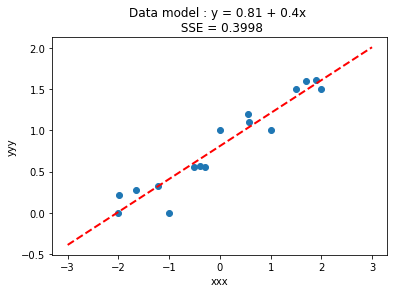

In [50]:
colNumX=2 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xtransp[1][irow]=xxx[irow]
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system


sse = 0
for irow in range(len(yvector)):
    ym=(beta[0]+beta[1]*xxx[irow])
    sse = sse + (ym-yvector[irow])**2

slope = beta[1] #0.129
intercept = beta[0]  # 22.813
xlow = -3
xhigh = 3
object = myline(slope,intercept,xlow,xhigh)
xone = object[0][0]; xtwo = object[0][1]; yone = object[1][0]; ytwo = object[1][1]
titleline= "Data model : y = " + str(round(beta[0],2)) + " + " + str(round(beta[1],2)) + "x \n SSE = " + str(round(sse,4))
makeAbear(xxx, yyy,xone,yone,xtwo,ytwo,'xxx','yyy',titleline)



So the model goes through the data (as it should), and the SSE is 0.3998.  How would we determine the RMSE based on our last lesson?

In [54]:
RMSE = sse/len(yvector)
print("RMSE = ",round(RMSE,4))

RMSE =  0.0297


So the RMSE is about 0.03.  Keep this in mind.

Now lets change to a cubic data model

$y_i=\beta_0+\beta_1 x_{i}+\beta_2 x_{i}^2 +  \beta_3 x_{i}^3 + \epsilon_i$

We already have the code, just need a few added columns (and rows)

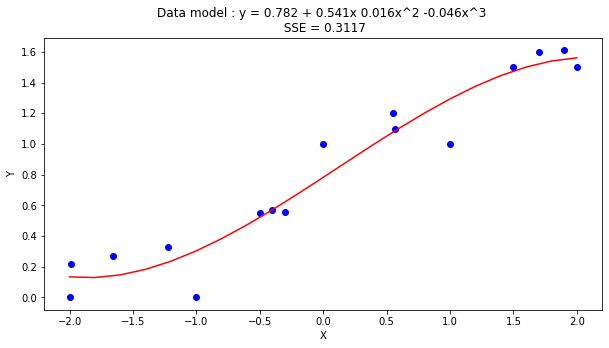

RMSE =  0.0195


In [57]:
colNumX=4 #
rowNumX=len(xxx)
xmatrix = [[1 for j in range(colNumX)]for i in range(rowNumX)]
xtransp = [[1 for j in range(rowNumX)]for i in range(colNumX)]
yvector = [0 for i in range(rowNumX)]
for irow in range(rowNumX):
    xmatrix[irow][1]=xxx[irow]
    xmatrix[irow][2]=xxx[irow]**2
    xmatrix[irow][3]=xxx[irow]**3
    xtransp[1][irow]=xxx[irow]
    xtransp[2][irow]=xxx[irow]**2
    xtransp[3][irow]=xxx[irow]**3
    yvector[irow]   =yyy[irow]
xtx = [[0 for j in range(colNumX)]for i in range(colNumX)]
xty = []

xtx = mmult(xtransp,xmatrix,colNumX,rowNumX,rowNumX,colNumX)
xty = mvmult(xtransp,yvector,colNumX,rowNumX)

beta = []
#solve XtXB = XtY for B
beta = linearsolver(xtx,xty) #Solve the linear system
howMany = 20
xlow = -2
xhigh = 2
deltax = (xhigh - xlow)/howMany
xmodel = []
ymodel = []

for i in range(howMany+1):
    xnow = xlow + deltax*float(i)
    xmodel.append(xnow)
    ymodel.append(beta[0]+beta[1]*xnow+beta[2]*xnow**2+beta[3]*xnow**3)

sse = 0
for irow in range(len(yvector)):
    ym=(beta[0]+beta[1]*xxx[irow]+beta[2]*xxx[irow]**2+beta[3]*xxx[irow]**3)
    sse = sse + (ym-yvector[irow])**2

# Now plot the sample values and plotting position
import matplotlib.pyplot 
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(xxx, yyy,  color ='blue') 
matplotlib.pyplot.plot(xmodel, ymodel,  color ='red') 
matplotlib.pyplot.ylabel("Y") 
matplotlib.pyplot.xlabel("X") 
titleline= "Data model : y = " + str(round(beta[0],3)) + " + " + str(round(beta[1],3)) + "x " + str(round(beta[2],3)) + "x^2 " + str(round(beta[3],3)) + "x^3 \n SSE = " + str(round(sse,4))
matplotlib.pyplot.title(titleline) 
matplotlib.pyplot.show()

RMSE = sse/len(yvector)
print("RMSE = ",round(RMSE,4))

So what did we gain?  

Our RMSE went down (by about 30\%), but look at the coefficients on the squared and cubic terms, they are an order of magnitude smaller than the intercept, and arguably pretty close to 0, so lets use a proper pakage to investigate.

:::{admonition} Examine the $\beta$'s 
:class: tip
We whould always examine the parameters with the question in mind - are they possibly zero, meaning that variable has no predictive value.  If we are doing homebrew we have a lot of work ahead of us, so in the next section same data different toolkit.
:::

### Using `statsmodel` package

First we load the packages (possibly again)

In [58]:
## Using `statsmodel` package
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

Check that we can make a datafranme

In [61]:
# Create a dataframe:
data = pd.DataFrame({'X':xxx, 'Y':yyy})
data.head(3)

,X,Y
0,-2.0,0.0
1,-1.0,0.0
2,0.0,1.0


Now some modeling

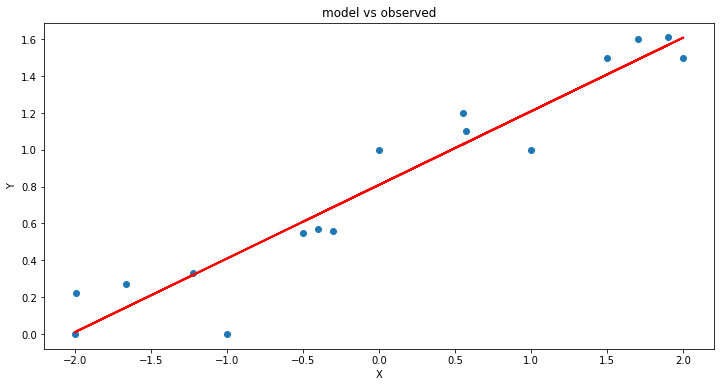

In [63]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()
# Predict values
y_pred = model.predict()
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=2)   # regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('model vs observed')
plt.show();

Now lets extract information from the modeling tool

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           5.28e-09
Time:                        19:14:37   Log-Likelihood:                 6.8117
No. Observations:                  16   AIC:                            -9.623
Df Residuals:                      14   BIC:                            -8.078
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8094      0.042     19.157      0.0

/opt/jupyterhub/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


:::{admonition} Examine the lower and upper confodence limits on the parameters
:class: tip
Notice for this example: <br>
Intercept      0.8094      0.042     19.157      0.000       0.719       0.900<br>
X              0.4001      0.032     12.545      0.000       0.332       0.468<br>
That the CI in both parameters excludes 0, suggesting that these two parameters are important.  In your statistic class you will learn more meaningful interpretation.
:::

Now lets amke a cubic model as in the homebrew example.

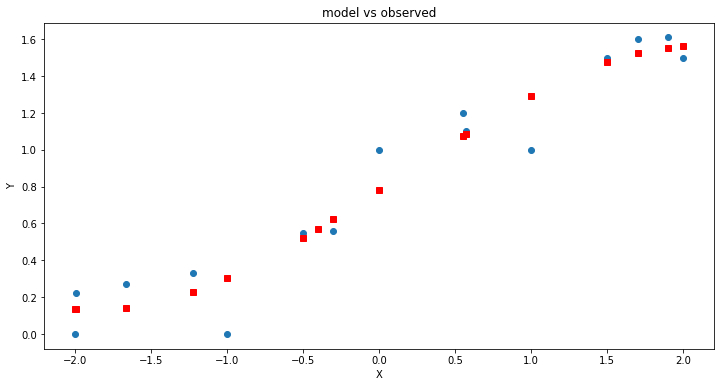

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.81
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.90e-07
Time:                        19:34:26   Log-Likelihood:                 8.8037
No. Observations:                  16   AIC:                            -9.607
Df Residuals:                      12   BIC:                            -6.517
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7824      0.062     12.646      0.0

/opt/jupyterhub/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [97]:
data['XX']=data['X']**2  # add a column of X^2
data['XXX']=data['X']**3  # add a column of X^2

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X+XX+XXX', data=data) # model object constructor syntax
model = model.fit()
# Predict values
y_pred = model.predict()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, marker='s', color='r', linewidth=0)   # regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('model vs observed')
plt.show();
print(model.summary())

So what did we gain?  

Our adjusted R^2 went up a teeny bit, but look at the coefficients on the squared and cubic terms, they are an order of magnitude smaller than the intercept, and arguably pretty close to 0, so lets use a proper pakage to investigate.

:::{admonition} Examine the $\beta$'s 
:class: tip
If we examine the report we see that the coefficients on the quadratic and cubic term could be zero with only a 5% error rate (95% chance that the value zero is included), so we would interpret these two predictors as suspected useless, and would be justified dropping these two variables and only using $x$ in this example.
:::

## References

<hr><hr>

## Laboratory 29

**Examine** (click) Laboratory 29 as a webpage at [Laboratory 29.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29.html)

**Download** (right-click, save target as ...) Laboratory 29 as a jupyterlab notebook from [Laboratory 29.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29.ipynb)


<hr><hr>

## Exercise Set 29

**Examine** (click) Exercise Set 29 as a webpage at [Exercise 29.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29-TH.html)

**Download** (right-click, save target as ...) Exercise Set 29 as a jupyterlab notebook at  [Exercise Set 29.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29-TH.ipynb)
